In [1]:
%matplotlib inline
from __future__ import division
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import struct
import pickle
import pandas as pd
import random

In [3]:
import sys
sys.path.append('../../src')

In [4]:
from pylab import rcParams
from IPython.display import clear_output
rcParams['figure.figsize'] = 16, 8
pd.options.display.max_columns = 999

In [5]:
from utils import FloatConvert32, FloatConvert64
from microssembly import Microssembly
from price_generator import random_walk, random_price

In [6]:
def plot_signals(observed_signal, signal):
    df = pd.DataFrame({'true': observed_signal - 0.5, 'generated': signal - 0.5}, index=observed_signal.index)
    ax = df.plot.bar()
    my_xticks = ['Sell', 'Buy']
    ax.set_yticks([-1, 1])
    ax.set_yticklabels(my_xticks)
    ax.set_xticklabels([])

In [7]:
def get_strategy_signal(price, short_ma, long_ma, demo=False):
    long_ma = abs(int(long_ma))
    shares = 1

    try:
        ml = price.rolling(long_ma).mean()

        buy = (ml > price) & (ml.shift() < price.shift())  # ma cross up
        sell = (ml < price) & (ml.shift() > price.shift())  # ma cross down
        signal = pd.Series(index=price.index)
        signal[buy[buy != False].index] = shares
        signal[sell[sell != False].index] = 0
    except Exception as e:
        print('Long {} Short {}'.format(long_ma, short_ma))
        raise e

    if demo is True:
        ax = price.plot()
        ml.plot()
        plt.legend(['price', 'Long MA'], loc='best')
        ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)

    return signal

((128,), (31,), 2015-06-18    0.0
 2015-06-26    1.0
 2015-07-02    0.0
 2015-07-15    1.0
 2015-07-16    0.0
 dtype: float64)

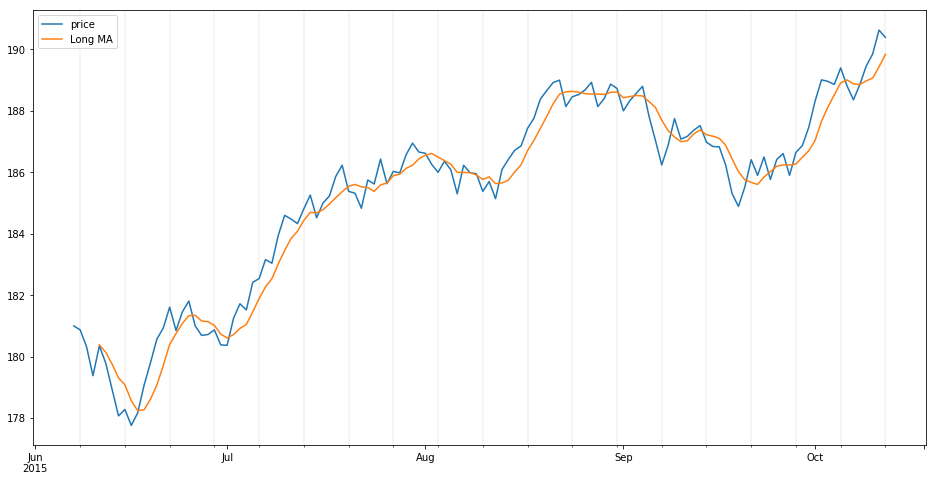

In [8]:
price = random_price()
signal = get_strategy_signal(price, 2, 5, True)
price.shape, signal.dropna().shape, signal.dropna()[:5]

In [9]:
from simple_strategy import get_signal, loss_function, eval_individual, find_best_model, plot_trades

In [10]:
loss = []
for _ in range(1000):
    price = random_price()
    random_code = ''.join(list(map(str, np.random.randint(0, 2, size=2000))))
    signal = get_signal(price, random_code)
    observed_signal = get_strategy_signal(price, 2, 5, False)
    l = loss_function(signal, observed_signal)    
    if(l > 0):
        loss.append(l)
print('avg\tstd\tmax\tmin')
print('{}\t{}\t{}\t{}'.format(round(np.average(loss), 3),
                              round(np.std(loss), 3),
                              round(np.max(loss), 3),
                              round(np.min(loss), 3)))

avg	std	max	min
0.0	0.003	0.054	0.0


In [11]:
def get_strategy_signal_1(price):
    return get_strategy_signal(price, 2, 5, False)

pop, hof, _ = find_best_model(get_strategy_signal_1,
                              ngen=2000,
                              pop_size=1000,
                              mutpb=0.01,
                              indpb=0.5,
                              ind_size=1000)

gen	nevals	avg        	std        	min        	max  
0  	1000  	1.78161e-10	5.52854e-11	1.42857e-10	3e-10
1  	999   	1.92542e-10	6.35396e-11	1.42857e-10	3e-10
2  	999   	0.0319767  	0          	0.0319767  	0.0319767
3  	1017  	0.031554   	0.00130822 	0.0248963  	0.0377754
4  	1003  	0.0312647  	0.00158874 	0.0252101  	0.0377754
5  	1008  	0.0310816  	0.00169902 	0.0255102  	0.0360849
6  	1044  	0.0309722  	0.0017105  	0.025      	0.0360849
7  	1035  	0.0309564  	0.00185039 	0.0259366  	0.0370236
8  	1020  	0.0308542  	0.00194526 	0.0261628  	0.0370236
9  	963   	0.0308386  	0.00193833 	0.0255102  	0.0362454
10 	1021  	0.0309622  	0.00200804 	0.0252101  	0.0391138
11 	1026  	0.0309813  	0.00217235 	0.0255102  	0.0403539
12 	1043  	0.0311035  	0.00206798 	0.0252101  	0.0403539
13 	1007  	0.0309275  	0.00204696 	0.0253165  	0.0403539
14 	1066  	0.030769   	0.00208118 	0.0251397  	0.0403539
15 	1016  	0.0309387  	0.00198278 	0.0251397  	0.0403539
16 	1021  	0.0309909  	0.00199967 	0.025316

143	987   	0.397055   	0.091153   	0.0612245  	0.57931  
144	987   	0.393892   	0.0915193  	0.108871   	0.57931  
145	1064  	0.399898   	0.0924692  	0.0599697  	0.57931  
146	1033  	0.399999   	0.0925725  	0.060197   	0.57931  
147	989   	0.397748   	0.0982791  	0.0542169  	0.57931  
148	1042  	0.398619   	0.0993269  	0.058221   	0.57931  
149	1030  	0.395935   	0.0962603  	0.06245    	0.57931  
150	1001  	0.400452   	0.0982669  	0.0560748  	0.57931  
151	1035  	0.400496   	0.0947998  	0.0581395  	0.57931  
152	1052  	0.393009   	0.0934814  	0.0581395  	0.57931  
153	1017  	0.389371   	0.09285    	0.0581395  	0.57931  
154	1041  	0.39146    	0.096669   	0.0592353  	0.57931  
155	1008  	0.386216   	0.0978082  	0.0590047  	0.57931  
156	1031  	0.388697   	0.0924163  	0.0581395  	0.57931  
157	1019  	0.390291   	0.0939986  	0.0607083  	0.57931  
158	1042  	0.389664   	0.0993972  	0.032979   	0.57931  
159	1005  	0.39123    	0.0990538  	0.0597742  	0.57931  
160	998   	0.393975   	0.098860

287	1028  	0.445153   	0.118934   	0.0636735  	0.57931  
288	1002  	0.446573   	0.117063   	0.0675966  	0.57931  
289	955   	0.438584   	0.119867   	0.0581395  	0.57931  
290	991   	0.43981    	0.122389   	0.0550122  	0.57931  
291	1048  	0.43834    	0.118667   	0.079646   	0.57931  
292	1047  	0.437301   	0.119856   	0.058391   	0.57931  
293	1005  	0.436328   	0.119211   	0.0626285  	0.57931  
294	1015  	0.434212   	0.119847   	0.0644007  	0.57931  
295	998   	0.440108   	0.116128   	0.0580556  	0.57931  
296	1028  	0.442089   	0.118218   	0.0580556  	0.57931  
297	1041  	0.447865   	0.117444   	0.0876827  	0.57931  
298	1004  	0.437671   	0.120715   	0.0580556  	0.57931  
299	1047  	0.431037   	0.118729   	0.057508   	0.57931  
300	1021  	0.426645   	0.119149   	0.0619048  	0.57931  
301	993   	0.426984   	0.120044   	0.057622   	0.57931  
302	1010  	0.427258   	0.121612   	0.0545455  	0.57931  
303	1041  	0.429043   	0.119724   	0.0576587  	0.57931  
304	1023  	0.431182   	0.118613

431	1062  	0.414029   	0.114439   	0.0615672  	0.57931  
432	1023  	0.418597   	0.111656   	0.0604839  	0.57931  
433	1040  	0.416631   	0.10898    	0.0618557  	0.57931  
434	1003  	0.417428   	0.110396   	0.0618557  	0.57931  
435	1068  	0.41244    	0.107286   	0.0592655  	0.57931  
436	1028  	0.413079   	0.106013   	0.0659019  	0.57931  
437	1033  	0.419034   	0.109301   	0.057508   	0.57931  
438	1053  	0.4168     	0.106864   	0.085362   	0.57931  
439	964   	0.425828   	0.110435   	0.0606231  	0.57931  
440	1016  	0.419407   	0.113684   	0.0588364  	0.57931  
441	1004  	0.415066   	0.105955   	0.0614934  	0.57931  
442	990   	0.418752   	0.105382   	0.0592688  	0.57931  
443	1008  	0.415439   	0.10771    	0.0628743  	0.57931  
444	1027  	0.407562   	0.110914   	0.0571358  	0.57931  
445	1058  	0.408785   	0.108892   	0.0592688  	0.57931  
446	983   	0.415729   	0.109322   	0.0603926  	0.57931  
447	1021  	0.41881    	0.114111   	0.0595238  	0.57931  
448	1002  	0.418417   	0.115362

575	1010  	0.445088   	0.120654   	0.0588492  	0.57931  
576	1003  	0.446032   	0.118679   	0.060393   	0.57931  
577	974   	0.449226   	0.119077   	0.0625501  	0.57931  
578	972   	0.446007   	0.120203   	0.0648918  	0.57931  
579	1002  	0.43776    	0.122507   	0.0617496  	0.57931  
580	1022  	0.441573   	0.120825   	0.0574233  	0.57931  
581	1009  	0.451906   	0.117675   	0.0571947  	0.57931  
582	1039  	0.447231   	0.117134   	0.0897756  	0.57931  
583	990   	0.44478    	0.117859   	0.0554842  	0.57931  
584	1040  	0.443008   	0.119709   	0.0600455  	0.57931  
585	1032  	0.44775    	0.121422   	0.0554842  	0.57931  
586	1014  	0.450922   	0.123126   	0.0614754  	0.57931  
587	1025  	0.445143   	0.124076   	0.0579524  	0.57931  
588	989   	0.447626   	0.124704   	0.0883807  	0.57931  
589	1037  	0.44468    	0.123554   	0.0620982  	0.57931  
590	1036  	0.44256    	0.12586    	0.0576587  	0.57931  
591	1051  	0.444711   	0.124644   	0.0586319  	0.57931  
592	1006  	0.444582   	0.124707

719	983   	0.413202   	0.114469   	0.0553506  	0.582041 
720	1027  	0.412857   	0.118473   	0.060197   	0.582041 
721	1012  	0.411984   	0.112511   	0.0600455  	0.582041 
722	1024  	0.415318   	0.117899   	0.0587319  	0.582041 
723	1049  	0.416941   	0.115674   	0.0600455  	0.582041 
724	1008  	0.412644   	0.116134   	0.0593306  	0.582041 
725	1029  	0.418638   	0.113344   	0.0580556  	0.582041 
726	981   	0.417221   	0.116124   	0.0606841  	0.582041 
727	988   	0.422753   	0.11591    	0.056314   	0.582041 
728	1069  	0.41491    	0.113392   	0.0616087  	0.582041 
729	995   	0.417418   	0.114795   	0.0569878  	0.582041 
730	1002  	0.412077   	0.117276   	0.0569878  	0.582041 
731	1035  	0.420724   	0.115115   	0.057365   	0.582041 
732	1031  	0.416417   	0.12035    	0.056872   	0.582041 
733	1037  	0.422866   	0.115914   	0.06       	0.582041 
734	1035  	0.428421   	0.117857   	0.0595147  	0.582041 
735	1010  	0.433424   	0.116954   	0.0554871  	0.582041 
736	1040  	0.432827   	0.113969

863	1008  	0.429244   	0.121886   	0.0590692  	0.57931  
864	1043  	0.427911   	0.121258   	0.0590692  	0.57931  
865	1039  	0.426218   	0.118037   	0.0579399  	0.57931  
866	1011  	0.426483   	0.116919   	0.0566513  	0.57931  
867	1030  	0.421184   	0.113639   	0.0605624  	0.57931  
868	1048  	0.421568   	0.11675    	0.0603015  	0.57931  
869	1048  	0.423253   	0.115826   	0.0579399  	0.57931  
870	1030  	0.425573   	0.113573   	0.0603015  	0.57931  
871	1013  	0.428436   	0.112121   	0.0578194  	0.57931  
872	1049  	0.421611   	0.115852   	0.0559702  	0.57931  
873	1016  	0.417206   	0.112567   	0.0564263  	0.57931  
874	1014  	0.422397   	0.110299   	0.0579399  	0.57931  
875	979   	0.422966   	0.111222   	0.0554455  	0.57931  
876	1016  	0.424779   	0.114794   	0.0589005  	0.57931  
877	1011  	0.42136    	0.113685   	0.0572294  	0.57931  
878	1045  	0.4189     	0.116525   	0.0559702  	0.57931  
879	1008  	0.418629   	0.112352   	0.0596356  	0.57931  
880	1034  	0.418551   	0.111441

1007	994   	0.426067   	0.111912   	0.0595147  	0.57931  
1008	1009  	0.428467   	0.113208   	0.0580789  	0.57931  
1009	1009  	0.421424   	0.113591   	0.0609947  	0.57931  
1010	1032  	0.426801   	0.113655   	0.0558862  	0.57931  
1011	985   	0.426108   	0.113901   	0.0581395  	0.57931  
1012	1055  	0.431098   	0.114963   	0.057508   	0.57931  
1013	1023  	0.424464   	0.118889   	0.0616938  	0.57931  
1014	1046  	0.429952   	0.120129   	0.0607477  	0.57931  
1015	993   	0.430468   	0.118038   	0.0636605  	0.57931  
1016	981   	0.434767   	0.116264   	0.0636185  	0.57931  
1017	1011  	0.43762    	0.117983   	0.0613497  	0.57931  
1018	1012  	0.430322   	0.116476   	0.0613497  	0.57931  
1019	1011  	0.432627   	0.118873   	0.0631579  	0.57931  
1020	1006  	0.435993   	0.118033   	0.0569878  	0.57931  
1021	1000  	0.436276   	0.119824   	0.06       	0.57931  
1022	984   	0.439791   	0.118884   	0.0594852  	0.57931  
1023	1015  	0.439326   	0.117705   	0.125771   	0.57931  
1024	1022  	0.

1149	985   	0.429975   	0.120667   	0.0641548  	0.57931  
1150	1023  	0.434556   	0.119173   	0.062737   	0.57931  
1151	1006  	0.431808   	0.119788   	0.0608828  	0.57931  
1152	997   	0.433858   	0.119622   	0.0572089  	0.57931  
1153	1072  	0.415514   	0.120709   	0.0581583  	0.57931  
1154	1009  	0.419574   	0.119552   	0.0330135  	0.57931  
1155	989   	0.4265     	0.116784   	0.0584416  	0.57931  
1156	1063  	0.425952   	0.115975   	0.0570975  	0.57931  
1157	988   	0.420302   	0.117574   	0.0565847  	0.57931  
1158	1030  	0.417617   	0.118527   	0.0565847  	0.57931  
1159	1021  	0.427545   	0.115508   	0.0596704  	0.57931  
1160	1019  	0.41819    	0.120473   	0.0625741  	0.57931  
1161	1033  	0.413618   	0.117499   	0.0572792  	0.57931  
1162	1002  	0.410499   	0.114145   	0.0572792  	0.57931  
1163	988   	0.411623   	0.114232   	0.0679099  	0.57931  
1164	1053  	0.418402   	0.113429   	0.055814   	0.57931  
1165	1013  	0.421649   	0.114747   	0.0598007  	0.57931  
1166	1009  	0.

1291	1005  	0.439045   	0.119414   	0.0569685  	0.57931  
1292	996   	0.437514   	0.122898   	0.0606061  	0.57931  
1293	1011  	0.435777   	0.121519   	0.119039   	0.57931  
1294	1021  	0.436231   	0.117609   	0.0849057  	0.57931  
1295	1055  	0.433414   	0.118157   	0.0543807  	0.57931  
1296	1017  	0.430427   	0.118235   	0.0609418  	0.57931  
1297	1034  	0.43198    	0.116602   	0.0606841  	0.57931  
1298	1032  	0.432072   	0.118187   	0.0642475  	0.57931  
1299	1005  	0.433622   	0.118144   	0.0852273  	0.57931  
1300	1007  	0.42551    	0.116591   	0.0609418  	0.57931  
1301	1049  	0.430606   	0.113079   	0.0599908  	0.57931  
1302	1030  	0.428747   	0.116322   	0.0568182  	0.57931  
1303	1052  	0.422435   	0.118572   	0.0573771  	0.57931  
1304	1045  	0.425195   	0.118053   	0.0593863  	0.57931  
1305	1003  	0.427176   	0.115169   	0.124691   	0.57931  
1306	989   	0.429885   	0.115642   	0.0582524  	0.57931  
1307	1026  	0.423255   	0.114213   	0.0594059  	0.57931  
1308	1036  	0.

1433	1007  	0.438116   	0.120813   	0.0587413  	0.57931  
1434	1027  	0.438523   	0.123613   	0.057554   	0.57931  
1435	1041  	0.437525   	0.118021   	0.0573248  	0.57931  
1436	1030  	0.430591   	0.120666   	0.0581395  	0.57931  
1437	1005  	0.434926   	0.11983    	0.0576587  	0.57931  
1438	1012  	0.436593   	0.116058   	0.0890411  	0.57931  
1439	991   	0.433558   	0.121212   	0.0569825  	0.57931  
1440	1021  	0.427338   	0.119571   	0.0889831  	0.57931  
1441	1024  	0.428525   	0.122924   	0.0583626  	0.57931  
1442	1036  	0.430125   	0.121694   	0.0576587  	0.57931  
1443	988   	0.435927   	0.118212   	0.0619266  	0.57931  
1444	976   	0.427583   	0.118815   	0.057508   	0.57931  
1445	1061  	0.427473   	0.11763    	0.0573248  	0.57931  
1446	1002  	0.428642   	0.116249   	0.0572477  	0.57931  
1447	1046  	0.432892   	0.116862   	0.0643777  	0.57931  
1448	1018  	0.432172   	0.119149   	0.060241   	0.57931  
1449	999   	0.426521   	0.118656   	0.060241   	0.57931  
1450	1020  	0.

1575	1027  	0.428221   	0.121262   	0.0588137  	0.57931  
1576	1076  	0.431691   	0.118071   	0.0584416  	0.57931  
1577	1037  	0.42657    	0.120393   	0.059434   	0.57931  
1578	1014  	0.427202   	0.119414   	0.0582686  	0.57931  
1579	1005  	0.436338   	0.119466   	0.0565847  	0.57931  
1580	1021  	0.438164   	0.118811   	0.0578194  	0.57931  
1581	1027  	0.434097   	0.119226   	0.0569751  	0.57931  
1582	1047  	0.432497   	0.119568   	0.061946   	0.57931  
1583	1087  	0.42711    	0.116424   	0.056678   	0.57931  
1584	1072  	0.425782   	0.119276   	0.0562793  	0.57931  
1585	977   	0.432568   	0.115753   	0.0568626  	0.607696 
1586	975   	0.431419   	0.112762   	0.0568626  	0.607696 
1587	999   	0.432003   	0.116408   	0.0577849  	0.57931  
1588	1006  	0.419017   	0.118582   	0.0527638  	0.57931  
1589	989   	0.422274   	0.120083   	0.0603326  	0.57931  
1590	1019  	0.436926   	0.120899   	0.0592353  	0.57931  
1591	1019  	0.433357   	0.119763   	0.056872   	0.57931  
1592	999   	0.

1717	1022  	0.434677   	0.123219   	0.0594059  	0.581897 
1718	1039  	0.43487    	0.117574   	0.059357   	0.581897 
1719	1037  	0.432126   	0.119562   	0.0592247  	0.581897 
1720	989   	0.432147   	0.117209   	0.0577915  	0.581897 
1721	996   	0.433851   	0.121377   	0.0577915  	0.581897 
1722	999   	0.434333   	0.120626   	0.0587712  	0.581897 
1723	997   	0.437221   	0.118031   	0.0572089  	0.581897 
1724	1041  	0.430848   	0.119628   	0.0679099  	0.581897 
1725	1010  	0.436898   	0.118674   	0.0679099  	0.581897 
1726	997   	0.438873   	0.121819   	0.0558862  	0.581897 
1727	988   	0.439388   	0.124113   	0.0558862  	0.581897 
1728	1046  	0.442077   	0.118177   	0.0562061  	0.581897 
1729	1036  	0.442829   	0.118627   	0.0535183  	0.581897 
1730	1026  	0.436642   	0.120025   	0.060273   	0.581897 
1731	1027  	0.434197   	0.119458   	0.0542169  	0.581897 
1732	1013  	0.441698   	0.119135   	0.0576923  	0.581897 
1733	1022  	0.434465   	0.11639    	0.062167   	0.581897 
1734	1063  	0.

1859	971   	0.431187   	0.121144   	0.0543478  	0.604317 
1860	985   	0.432373   	0.117388   	0.0605886  	0.604317 
1861	1004  	0.435854   	0.1176     	0.0610546  	0.604317 
1862	1013  	0.439647   	0.117337   	0.0554842  	0.604317 
1863	1045  	0.438008   	0.11911    	0.0662252  	0.604317 
1864	1032  	0.43291    	0.121211   	0.0629514  	0.604317 
1865	1028  	0.435774   	0.119267   	0.059081   	0.604317 
1866	991   	0.437592   	0.115723   	0.0584588  	0.604317 
1867	1014  	0.43765    	0.116207   	0.0560486  	0.604317 
1868	1022  	0.438992   	0.122907   	0.0608856  	0.604317 
1869	1036  	0.436716   	0.12052    	0.12931    	0.604317 
1870	1020  	0.429708   	0.122056   	0.057971   	0.604317 
1871	1023  	0.429906   	0.117841   	0.0894107  	0.604317 
1872	1074  	0.424737   	0.120458   	0.0580789  	0.604317 
1873	1035  	0.427229   	0.120711   	0.060423   	0.604317 
1874	1005  	0.427084   	0.124011   	0.0560748  	0.604317 
1875	1025  	0.427469   	0.120715   	0.0592061  	0.604317 
1876	1038  	0.

In [12]:
best_code = ''.join(map(str, hof[0]))

In [13]:
all_loss = []
for i in range(100):
    price = random_price()
    signal = get_signal(price, best_code)
    observed_signal = get_strategy_signal_1(price)
    all_loss.append(loss_function(signal, observed_signal))
np.average(all_loss)

0.32923336142741294

In [14]:
signal.dropna()[:10]

2009-09-12    1.0
2009-09-13    1.0
2009-09-14    0.0
2009-09-15    1.0
2009-09-16    0.0
2009-09-17    0.0
2009-09-18    0.0
2009-09-19    1.0
2009-09-20    0.0
2009-09-21    0.0
dtype: float64

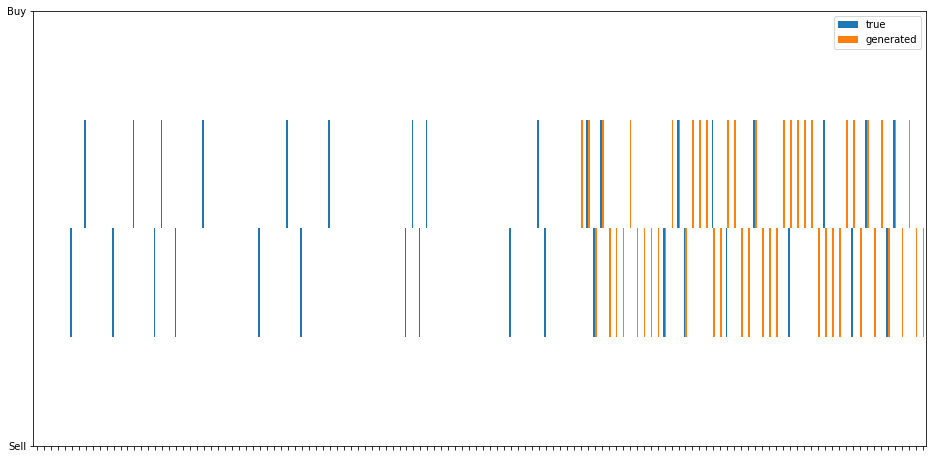

In [15]:
plot_signals(observed_signal, signal)

In [16]:
import microssembly
mssembly = Microssembly(in_memory_length=3, out_memory_length=1, registers_length=3)
mssembly.run(best_code)

['dec [1]',
 'add [0] [5]',
 'add [4] [0]',
 'add [1] [0]',
 'load [4] [2]',
 'max [0] [4]',
 'set [78] [6]',
 'set [206] [4]',
 'set [24] [3]',
 'ignore',
 'set [234] [6]',
 'set [7] [0]',
 'set [49] [0]',
 'set [136] [1]',
 'stop-ignore',
 'stop-ignore',
 'div [0] [7]',
 'bin-max [1] [1]',
 'bin-max [5] [6]',
 'unload [6] [0]',
 'ignore-if [5]',
 'max [2] [5]',
 'unload [3] [0]',
 'set [246] [5]',
 'bin-max [7] [2]',
 'bin-max [7] [7]',
 'set [234] [2]',
 'bin-max [5] [6]',
 'min [0] [5]',
 'bin-min [0] [2]',
 'load [7] [3]',
 'inc [4]',
 'ignore-if [0]',
 'set [192] [1]',
 'set [255] [6]',
 'stop-ignore',
 'min [3] [2]',
 'add [6] [6]',
 'ignore',
 'set [1] [6]']

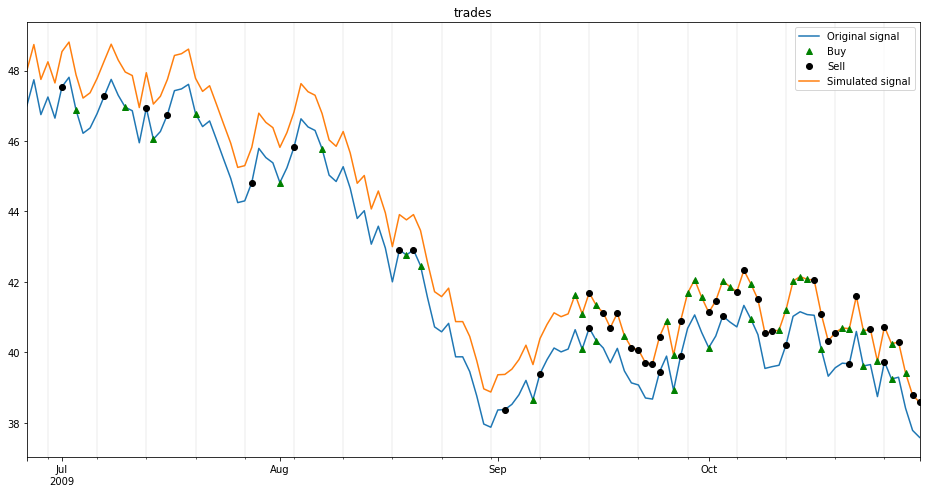

In [17]:
plot_trades(price, observed_signal, plt)
plot_trades(price + 1, signal, plt)
plt.legend(['Original signal', 'Buy', 'Sell', 'Simulated signal'], loc='best')

In [18]:
a = (np.sum(signal[observed_signal[observed_signal == 1].index] == 1)
     / len(observed_signal[observed_signal == 1]) + 1e-9)
b = (np.sum(signal[observed_signal[observed_signal == 0].index] == 0)
     / len(observed_signal[observed_signal == 0]) + 1e-9)
c = (np.sum(np.isnan(signal[observed_signal[observed_signal.isna()].index]))
     / len(observed_signal[observed_signal.isna()]) + 1e-9)

In [19]:
a, b, c, 3 / (1/a + 1/b + 1/c)

(0.3529411774705883,
 0.23529411864705882,
 0.627659575468085,
 0.34575940208501077)

In [20]:
mssembly.out_memory

array([24.,  0.])